# FODS ASSIGNMENT-1

# Assignment 1 Part-A

### Loading data


In [1082]:
import numpy as np
import pandas as pd
data = pd.read_csv('Data.csv')
print(data)
# Loaded the dataset into a pandas DataFrame

            X         Y
0    0.987988  5.098368
1    0.719720  2.516654
2   -0.403403  0.337961
3    0.107107  0.737320
4    0.345345 -0.780955
..        ...       ...
995  0.671672  3.079356
996 -0.615616  0.027487
997  0.259259  1.068320
998  0.119119  0.245188
999  0.369369  0.545114

[1000 rows x 2 columns]


### Normalize the data


In [1083]:
data = pd.read_csv('Data.csv')
X_mean , Y_mean = data.mean()
X_std , Y_std = data.std()
data['X']= (data['X'] - X_mean)/X_std
shuffled_data = data.sample(frac=1)
print(shuffled_data)


            X         Y
114 -0.846550  1.225622
506 -0.341044 -0.146570
352 -0.489925  0.429411
442  1.559798  2.987037
625  0.299495  0.803824
..        ...       ...
360 -0.472614  1.258335
575 -1.293196 -1.107496
325 -1.466314 -2.308685
720 -0.725367  0.076788
518 -1.397067 -1.098051

[1000 rows x 2 columns]


### Splitting the data in test and train

In [1084]:
split_ratio = 0.8
row_no, col_no = shuffled_data.shape
train_length = int(row_no*split_ratio)

Train = shuffled_data[:train_length]
Test = shuffled_data[train_length:]

X_Train = Train['X'].values
X_Test = Test['X'].values
Y_Test = Test['Y'].values
Y_Train = Train['Y'].values

## Polynomial Transformation function for 1 feature dataset

In [1085]:
def poly_transform(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.insert(transform_data, i, transformed_feature, axis=1)
    return transform_data

## Polynomial Regression using Batch Gradient descent

[1.6051891146523725, 1.6695329049109955, 1.0870316355151846, 1.111610852112275, 1.0955927508752021, 1.0750774566816863, 1.0705989952331572, 1.094259281495121, 8.144955075253679e+233]


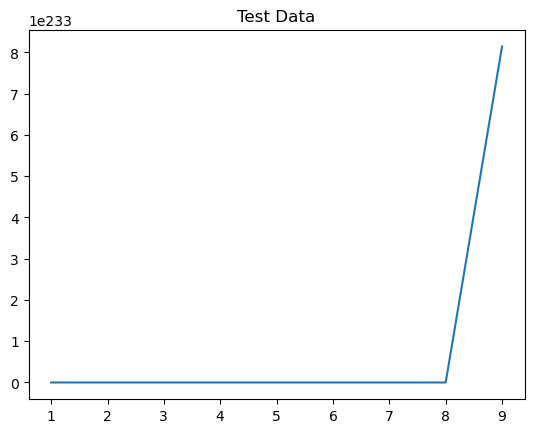

[1.6535822407610448, 1.6049549478884402, 1.0359855353206258, 1.0708644499480844, 1.0935963415396706, 1.0737699113844004, 1.0555162691876883, 1.0712665910822616, 9.69340485550552e+233]


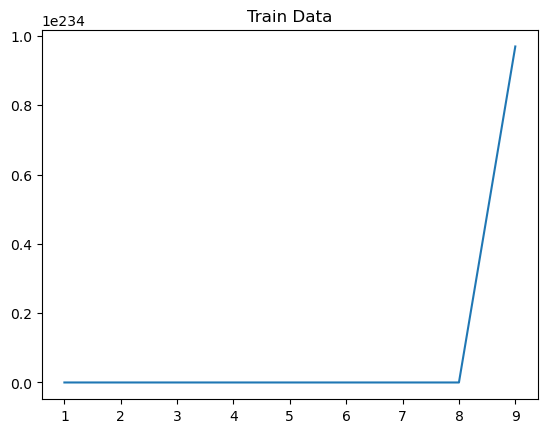

In [1086]:
import numpy as np
import matplotlib.pyplot as plt
def bgd_regressor(train, test, learning_rate=0.0022, max_iters=500):
    X = train
    Y = test
    W = np.zeros(train.shape[1])
    n = len(train)
    for _ in range(max_iters):
        Y_pred = np.dot(X, W)
        gradient = np.dot(X.T, Y_pred - Y)
        change = (learning_rate / len(X)) * gradient
        W -= change
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output = []
for i in degrees:
    X_Train_poly = poly_transform(X_Train, i)
    X_Test_poly = poly_transform(X_Test, i)
    W_poly = bgd_regressor(X_Train_poly, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly, W_poly)
    mse = mean_squared_error(Y_Test, Y_Test_pred)
    output.append(mse)

print(output)
plt.plot(degrees, output)
plt.title("Test Data")
plt.show()

output_Train = []
for i in degrees:
    X_Train_poly = poly_transform(X_Train, i)
    X_Test_poly = poly_transform(X_Test, i)
    W_poly = bgd_regressor(X_Train_poly, Y_Train)
    Y_Train_pred = np.dot(X_Train_poly, W_poly)
    mse = mean_squared_error(Y_Train, Y_Train_pred)
    output_Train.append(mse)

print(output_Train)
plt.plot(degrees, output_Train)
plt.title("Train Data")
plt.show()

## Best Fit Graph

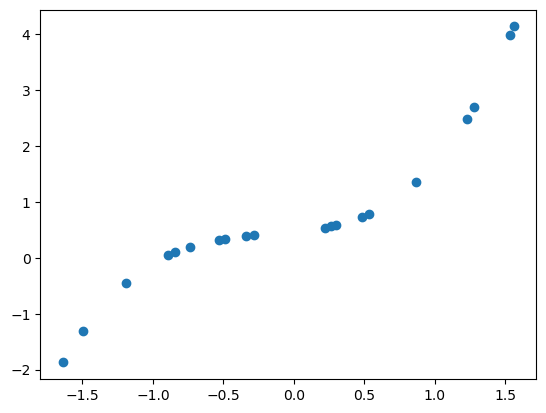

In [1087]:
import matplotlib.pyplot as plt
X_Train_poly = poly_transform(X_Train, 3)
W_poly = bgd_regressor(X_Train_poly, Y_Train)
Test_data_points_Feature = X_Train[:20]
Test_data_points_Feature_trans = poly_transform(Test_data_points_Feature, 3)
Test_data_points_target = Y_Train[:20]
Y_Train_pred = np.dot(Test_data_points_Feature_trans, W_poly)
plt.scatter(Test_data_points_Feature, Y_Train_pred)
plt.show()


## Comparative analysis

### We have used the Batch Gradient Descent Algorithm to optimize and find the values of parameters and for garph plotting we have used mean square error as error and degree of polynomial ranging from 1 to 9. Among all the 9 models we see that the mean square error for the test data set is minimum when degree of polynomial is 3 and for train data set it is also 3 which suggest that for the given dataset the best model is for polynomial of degree 3

# Assignemt 1 Part-B
 

### Loading data


In [1088]:
import numpy as np
import pandas as pd
data = pd.read_csv('data2.csv')

### Normalize the data

In [1089]:
data = pd.read_csv('data2.csv')
Height_mean , Width_mean , Weight_mean = data.mean()
Height_std , Width_std , Weight_std = data.std()
data['Height'] = (data['Height'] - Height_mean)/ Height_std
data['Width'] = (data['Width'] - Width_mean)/ Width_std
data = np.array(data)
np.random.shuffle(data)
print(data)

[[ 3.73455145e-01  1.15619290e+00  6.90000000e+02]
 [ 1.63841953e+00  5.65258203e-01  6.85000000e+02]
 [-7.64893818e-01 -5.11616772e-01  1.10000000e+02]
 [ 8.20726993e-01  1.88534059e+00  1.00000000e+03]
 [ 3.82180807e-01  1.37816415e+00  7.00000000e+02]
 [-1.37789338e-01 -1.00774199e-01  2.70000000e+02]
 [ 2.11513466e+00  1.12042361e+00  9.20000000e+02]
 [-4.50266827e-02  1.56669747e-01  3.06000000e+02]
 [-6.00762711e-01 -2.61291092e-01  3.45000000e+02]
 [-7.77142408e-01 -5.29412437e-01  1.20000000e+02]
 [-1.56175209e+00 -1.87547650e+00  1.22000000e+01]
 [ 4.93911279e-01 -1.62228560e-01  2.73000000e+02]
 [-4.52053163e-01 -3.54243780e-01  1.60000000e+02]
 [-2.76466708e-01  4.22418336e-01  5.40000000e+02]
 [ 6.50973200e-01  1.27898298e+00  8.00000000e+02]
 [ 4.34884741e-01  1.09568764e+00  7.00000000e+02]
 [-1.57647373e+00 -1.92880417e+00  9.90000000e+00]
 [ 1.39596744e+00  4.46857715e-01  6.00000000e+02]
 [-1.57647373e+00 -1.85886721e+00  1.00000000e+01]
 [ 8.63002126e-01  1.61652533e-

## Splitting the data into test and train

In [1090]:
n, m = data.shape
split_ratio = 0.8
Train_2 = data[:int(0.8*n),:]
Test_2 = data[int(0.8*n):,:]
X_Train = Train_2[:,:-1]
Y_Train = Train_2[:,-1]
X_Test = Test_2[:,:-1]
X_Test_Height = X_Test[:,0]
X_Test_Width = X_Test[:,1]
Y_Test = Test_2[:,-1]

## Polynomial Transform Function for multiple feature model

In [1091]:
def poly_transform_2(data: np.ndarray, degrees: int):
    transform_data = np.ones((data.shape[0], 1))
    for i in range(1, degrees + 1):
        transformed_feature = data ** i
        transform_data = np.concatenate((transform_data,transformed_feature), axis=1)
    return transform_data

# Polynomial Regression

In [1092]:
def poly_reg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.00003, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_poly(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train_poly = poly_transform_2(X_Train,3)
X_Transformed_Test_poly  = poly_transform_2(X_Test,3)
W_poly = poly_reg(X_transformed_Train_poly, Y_Train)
W_poly
Y_pred_one_deg = np.dot(X_Transformed_Test_poly, W_poly)

mse_poly = mean_squared_error_poly(Y_Test, Y_pred_one_deg)
degrees = [1,2,3,4,5,6,7,8,9]
output_poly1 = []
for i in degrees:
    X_Train_poly_poly = poly_transform_2(X_Train, i)
    X_Test_poly_poly = poly_transform_2(X_Test, i)
    W_poly = poly_reg(X_Train_poly_poly, Y_Train)
    Y_Test_pred_poly = np.dot(X_Test_poly_poly,W_poly)
    mse_poly = mean_squared_error_poly(Y_Test, Y_Test_pred_poly)
    output_poly1.append(mse_poly)

print(output_poly1)

[177570.2182860414, 109532.70918451562, 60274.713003867044, 81099.3796117818, 147120.25676917538, 156961.07908444252, 124463.11532583005, 61150.7279904737, 1.0233276993450772e+71]


# Batch Gradient Descent

## Batch gradient descent with q as 0.5

In [1093]:
def half_reg(X:np.ndarray, Y:np.ndarray,max_iter = 500 ,penalty = 1e-15, learning_rate = 0.00007):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        Y_pred = np.dot(X,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
        if flag == False:
            grad = 1/n*np.dot(X.T, Y_pred-Y)
        else:
            grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5
        W -= learning_rate*grad
        learning_rate /=1.000005
    return W

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


degrees = [1,2,3,4,5,6,7,8,9]
output_bch_half = []
for i in degrees:
    X_Train_poly_bch_half = poly_transform_2(X_Train, i)
    X_Test_poly_bch_half = poly_transform_2(X_Test, i)
    W_bch_half = half_reg(X_Train_poly_bch_half, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_half,W_bch_half)
    mse_bch_half = mean_squared_error(Y_Test, Y_Test_pred)
    output_bch_half.append(mse_bch_half)

print(output_bch_half)


[237785.48054587742, 209709.69607319933, 161900.7818064989, 103368.79023947184, 116810.25358281794, 216482.45565903306, nan, nan, nan]


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/451723622.py:13: RuntimeWarning: invalid value encountered in power
  grad = 1/n*np.dot(X.T, Y_pred-Y) + penalty*0.5*W**-0.5


## Batch gradient descent with q as 1

In [1094]:
def one_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.002, l1_penalty = 1e-10, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_transformed_Train = poly_transform_2(X_Train,3)
X_Transformed_Test  = poly_transform_2(X_Test,3)
W_one = one_deg(X_transformed_Train, Y_Train)
Y_pred_one_deg = np.dot(X_Transformed_Test, W_one)

mse_one = mean_squared_error_one_deg(Y_Test, Y_pred_one_deg)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_one = []
for i in degrees:
    X_Train_poly_bch_one = poly_transform_2(X_Train, i)
    X_Test_poly_bch_one = poly_transform_2(X_Test, i)
    W_bch_one = one_deg(X_Train_poly_bch_one, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_one,W_bch_one)
    mse_bch_one = mean_squared_error_one_deg(Y_Test, Y_Test_pred)
    output_bch_one.append(mse_bch_one)

print(output_bch_one)

[17698.889812079047, 13818.105426750775, 11811.74998901484, 9547.661748224393, 14575.790883158783, 20433.158369217093, nan, nan, nan]


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/2990452559.py:8: RuntimeWarning: invalid value encountered in subtract
  W -= change


## Batch gradient descent with q as 2

In [1095]:
def two_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.00002, l1_penalty = 1e-10, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = np.dot(X.T, Y_pred-Y) + l1_penalty*(np.abs(W))
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_two = poly_transform_2(X_Train,3)
X_transformed_Test_two = poly_transform_2(X_Test,3)
W_two = two_deg(X_transformed_two, Y_Train)
Y_pred_two_deg = np.dot(X_transformed_Test_two, W_two)
mse_two = mean_squared_error_two_deg(Y_Test, Y_pred_two_deg)

degrees = [1,2,3,4,5,6,7,8,9]
output_bch_two = []
for i in degrees:
    X_Train_poly_bch_two = poly_transform_2(X_Train, i)
    X_Test_poly_bch_two = poly_transform_2(X_Test, i)
    W_bch_two = two_deg(X_Train_poly_bch_two, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_two,W_bch_two)
    mse_bch_two = mean_squared_error_two_deg(Y_Test, Y_Test_pred)
    output_bch_two.append(mse_bch_two)

print(output_bch_two)

[18354.649425785497, 14004.492374251724, 11477.57153571205, 9778.713582037914, 15143.85343216183, 18613.988204653695, nan, nan, nan]


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/4188271921.py:8: RuntimeWarning: invalid value encountered in subtract
  W -= change
/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/4188271921.py:6: RuntimeWarning: invalid value encountered in add
  gradient = np.dot(X.T, Y_pred-Y) + l1_penalty*(np.abs(W))


## Batch gradient descent with q as 4

In [1096]:
def four_deg(X: np.ndarray,Y: np.ndarray, learning_rate = 0.002, l1_penalty = 1e-10, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    Y_pred = np.dot(X, W)
    gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_four_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) **2)

X_transformed_four = poly_transform_2(X_Train,3)
X_transformed_Test_four = poly_transform_2(X_Test,3)
W_four = four_deg(X_transformed_four, Y_Train)
Y_pred_four_deg = np.dot(X_transformed_Test_four, W_four)
mse_four = mean_squared_error_four_deg(Y_Test, Y_pred_four_deg)
degrees = [1,2,3,4,5,6,7,8,9]
output_bch_four = []
for i in degrees:
    X_Train_poly_bch_four = poly_transform_2(X_Train, i)
    X_Test_poly_bch_four = poly_transform_2(X_Test, i)
    W_bch_four = four_deg(X_Train_poly_bch_four, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_bch_four,W_bch_four)
    mse_bch_four = mean_squared_error_four_deg(Y_Test, Y_Test_pred)
    output_bch_four.append(mse_bch_four)

print(output_bch_four)

/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/953976006.py:6: RuntimeWarning: overflow encountered in power
  gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))
/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/953976006.py:6: RuntimeWarning: invalid value encountered in add
  gradient = (1/n)*np.dot(X.T, Y_pred-Y) + 2*l1_penalty*(np.abs(W**3))


[17696.861463413206, 13817.113694480991, 11811.686094630506, 9547.363373691896, 14574.84384164983, 20432.90708842424, nan, nan, nan]


# Stocastic Gradeint Descent

## Stocastic gradient descent with q as 0.5

In [1097]:
def half_reg_stc(X:np.ndarray, Y:np.ndarray,max_iter = 5000 ,penalty = 0.9, learning_rate = 0.003):
    n, m = X.shape
    W = np.zeros(X.shape[1])
    for _ in range(max_iter):
        idx = np.random.randint(0, n-1)
        X_temp = X[idx]
        Y_temp = Y[idx]
        Y_pred = np.dot(X_temp,W)
        flag = True
        for iW in W:
            if iW == 0.0:
                flag = False
                break

        if flag == False:
            grad = np.dot(X_temp.T, Y_pred-Y_temp)
        else:
            grad = np.dot(X_temp.T, Y_pred-Y_temp) + penalty*0.5*np.abs(W)**-0.5
        W -= learning_rate*grad
        learning_rate /=1.00005
    return W

def mean_squared_error_stc_half(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_half = []
for i in degrees:
    X_Train_poly_stc_half = poly_transform_2(X_Train, i)
    X_Test_poly_stc_half = poly_transform_2(X_Test, i)
    W_stc_half = half_reg_stc(X_Train_poly_stc_half, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_half,W_stc_half)
    mse_stc_half = mean_squared_error_stc_half(Y_Test, Y_Test_pred)
    output_stc_half.append(mse_stc_half)
 
print(output_stc_half)

/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/2835068103.py:19: RuntimeWarning: invalid value encountered in subtract
  W -= learning_rate*grad


[17612.830428091096, 13828.361767820174, 12371.421258675553, 11892.833882661178, 1.2881522804360496e+156, nan, nan, nan, nan]


## Stocastic gradient descent with q as 1

In [1098]:
def one_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 0.5*l1_penalty*np.sign(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_one_deg(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_one = []
for i in degrees:
    X_Train_poly_stc_one = poly_transform_2(X_Train, i)
    X_Test_poly_stc_one = poly_transform_2(X_Test, i)
    W_stc_one = one_deg_stoic(X_Train_poly_stc_one, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_one,W_stc_one)
    mse_stc_one = mean_squared_error_one_deg(Y_Test, Y_Test_pred)
    output_stc_one.append(mse_stc_one)
 
print(output_stc_one)

[42229.9029681142, 17992.203474083144, 37682.817304902834, 61316.07099309006, 58238.42136646064, 42696.58766697945, 2.293545219949798e+158, nan, nan]


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/3095421281.py:11: RuntimeWarning: invalid value encountered in subtract
  W -= change


## Stocastic gradient descent with q as 2

In [1099]:
def two_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.9, max_iters = 5000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + l1_penalty*np.abs(W)
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_two_deg_stoic(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_two = []
for i in degrees:
    X_Train_poly_stc_two = poly_transform_2(X_Train, i)
    X_Test_poly_stc_two = poly_transform_2(X_Test, i)
    W_stc_two = two_deg_stoic(X_Train_poly_stc_two, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_two,W_stc_two)
    mse_stc_two = mean_squared_error_two_deg_stoic(Y_Test, Y_Test_pred)
    output_stc_two.append(mse_stc_two)
 
print(output_stc_two)

[108196.4216264352, 51633.533665371, 40035.098669298044, 65455.409820187015, 98062.98909474039, 338600.9844295733, 2.3949117745444053e+172, nan, nan]


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/906385365.py:11: RuntimeWarning: invalid value encountered in subtract
  W -= change


## Stocastic gradient descent with q as 4

In [1100]:
def four_deg_stoic(X: np.ndarray,Y: np.ndarray, learning_rate = 0.0003, l1_penalty = 0.0001, max_iters = 8000):
  W = np.zeros(X.shape[1])
  n = len(X)
  for _ in range(max_iters):
    idx = np.random.randint(0, n-1)
    X_temp_stoic = X[idx]
    Y_temp_stoic = Y[idx]
    Y_pred = np.dot(X_temp_stoic, W)
    gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 3/2*l1_penalty*W**3
    change = learning_rate*gradient
    W -= change
  return W

def mean_squared_error_four_deg_stoic(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

degrees = [1,2,3,4,5,6,7,8,9]
output_stc_four = []
for i in degrees:
    X_Train_poly_stc_four = poly_transform_2(X_Train, i)
    X_Test_poly_stc_four = poly_transform_2(X_Test, i)
    W_stc_four = four_deg_stoic(X_Train_poly_stc_four, Y_Train)
    Y_Test_pred = np.dot(X_Test_poly_stc_four,W_stc_four)
    mse_stc_four = mean_squared_error_four_deg_stoic(Y_Test, Y_Test_pred)
    output_stc_four.append(mse_stc_four)
 
print(output_stc_four)


/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/489982970.py:9: RuntimeWarning: overflow encountered in power
  gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 3/2*l1_penalty*W**3
/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/489982970.py:9: RuntimeWarning: invalid value encountered in add
  gradient = (1/2)*np.dot(X_temp_stoic.T, Y_pred-Y_temp_stoic) + 3/2*l1_penalty*W**3
/var/folders/y1/jtqp0ms55s5gdzgq8p3t34gc0000gp/T/ipykernel_36386/489982970.py:11: RuntimeWarning: invalid value encountered in subtract
  W -= change


[115648.62977301175, 48195.093977127835, 37247.644994176364, 55693.68114366995, 69928.76824905784, 37318.01947313691, nan, nan, nan]


# Task -- 3

## Surface Plot for Polynomial Regression

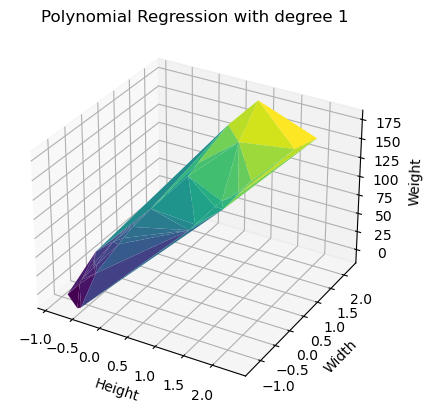

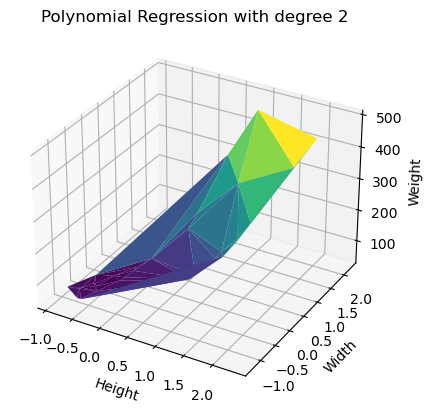

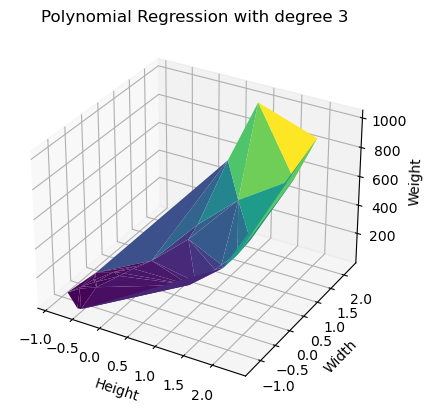

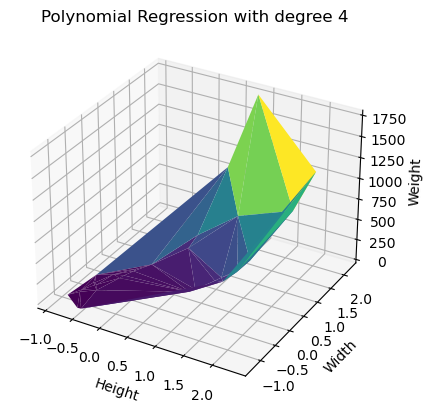

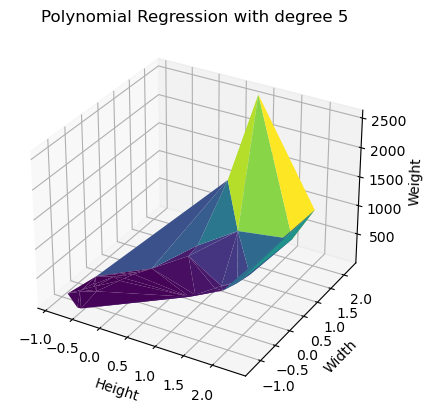

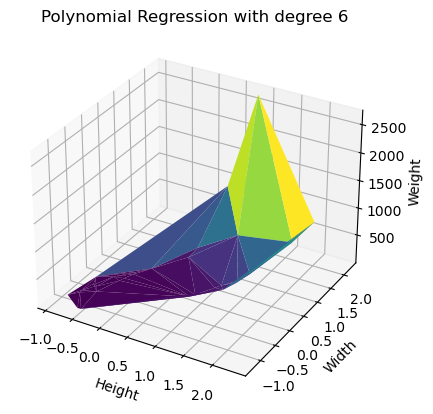

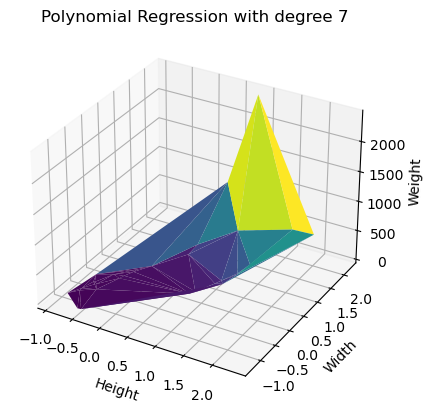

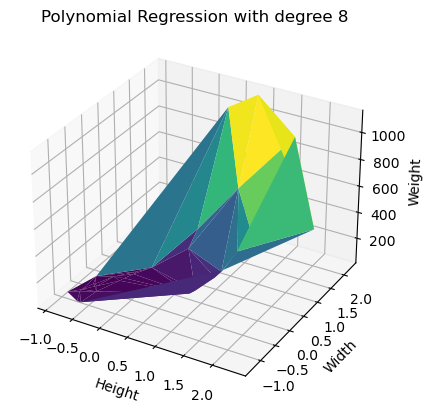

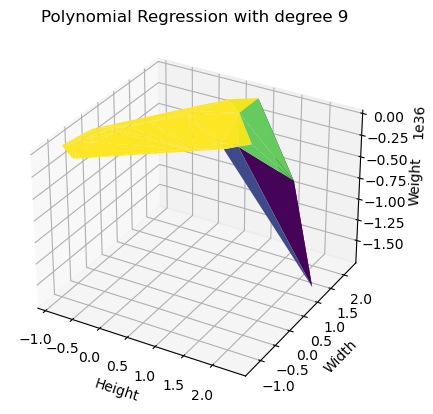

In [1101]:
from mpl_toolkits.mplot3d import Axes3D
degrees = [1,2,3,4,5,6,7,8,9]
output_poly = []
for i in degrees:
    X_Train_poly_poly = poly_transform_2(X_Train, i)
    X_Test_poly_poly = poly_transform_2(X_Test, i)
    W_poly = poly_reg(X_Train_poly_poly, Y_Train)
    Y_Test_pred_poly = np.dot(X_Test_poly_poly,W_poly)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred_poly, cmap='viridis', edgecolor='none')
    ax.set_xlabel('Height')
    ax.set_ylabel('Width')
    ax.set_zlabel('Weight')
    plt.title(f"Polynomial Regression with degree {i}")
    plt.show()


## Surface curve for 4 optimal curves

### Optimal curve for degree 0.5 is of 3 degree polynomial (Stochastic Gradient Descent)

Text(0.5, 0, 'Weight')

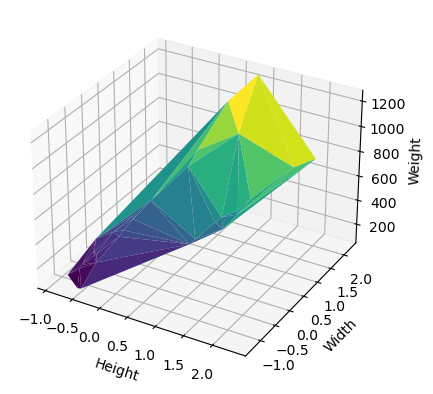

In [1102]:
X_Train_poly_deg_half = poly_transform_2(X_Train, 3)
X_Test_poly_deg_half = poly_transform_2(X_Test, 3)
W_deg_half = half_reg_stc(X_Train_poly_deg_half, Y_Train)
Y_Test_pred_deg_half = np.dot(X_Test_poly_deg_half,W_deg_half)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred_deg_half, cmap='viridis', edgecolor='none')
ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')

### Optimal curve for degree 1 is of 3 degree polynomial (Batch Gradient Descent)

Text(0.5, 0, 'Weight')

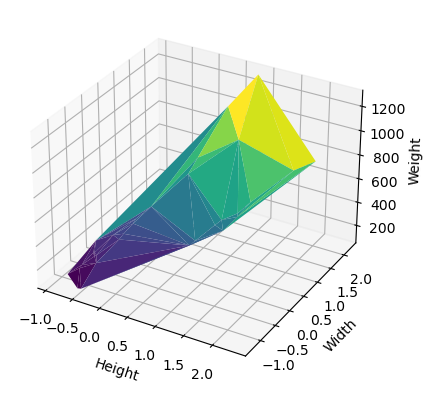

In [1103]:
X_Train_poly_deg_one = poly_transform_2(X_Train, 3)
X_Test_poly_deg_one = poly_transform_2(X_Test, 3)
W_deg_one = one_deg(X_Train_poly_deg_one, Y_Train)
Y_Test_pred_deg_one = np.dot(X_Test_poly_deg_one,W_deg_one)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred_deg_one, cmap='viridis', edgecolor='none')
ax1.set_xlabel('Height')
ax1.set_ylabel('Width')
ax1.set_zlabel('Weight')

### Optimal curve for degree 2 is of 4 degree polynomial (Batch Gradient Descent)

Text(0.5, 0, 'Weight')

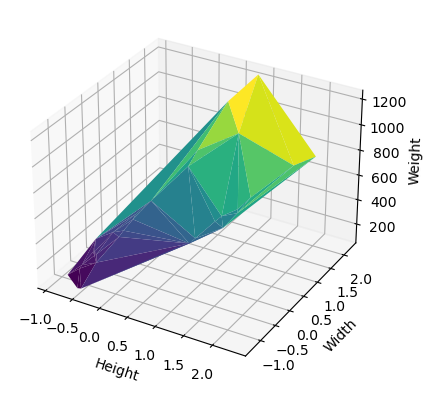

In [1104]:
X_Train_poly_deg_two = poly_transform_2(X_Train, 3)
X_Test_poly_deg_two = poly_transform_2(X_Test, 3)
W_deg_two = two_deg(X_Train_poly_deg_two, Y_Train)
Y_Test_pred_deg_two = np.dot(X_Test_poly_deg_two,W_deg_two)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred_deg_two, cmap='viridis', edgecolor='none')
ax2.set_xlabel('Height')
ax2.set_ylabel('Width')
ax2.set_zlabel('Weight')

### Optimal curve for degree 4 is of 2 degree polynomial (Batch Gradient Descent)

Text(0.5, 0, 'Weight')

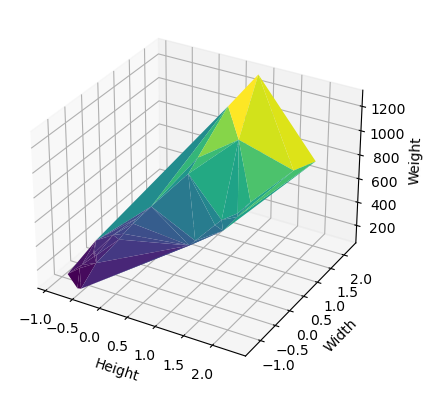

In [1105]:
X_Train_poly_deg_four = poly_transform_2(X_Train, 3)
X_Test_poly_deg_four = poly_transform_2(X_Test, 3)
W_deg_four = four_deg(X_Train_poly_deg_four, Y_Train)
Y_Test_pred_deg_four = np.dot(X_Test_poly_deg_four,W_deg_four)
fig3 = plt.figure()
ax3= fig3.add_subplot(111, projection='3d')
ax3.plot_trisurf(X_Test_Height, X_Test_Width, Y_Test_pred_deg_four, cmap='viridis', edgecolor='none')
ax3.set_xlabel('Height')
ax3.set_ylabel('Width')
ax3.set_zlabel('Weight')

# Task --- 4

## Comparative Analysis

### Polynomial Regression

[177570.2182860414, 109532.70918451562, 60274.713003867044, 81099.3796117818, 147120.25676917538, 156961.07908444252, 124463.11532583005, 61150.7279904737, 1.0233276993450772e+71]


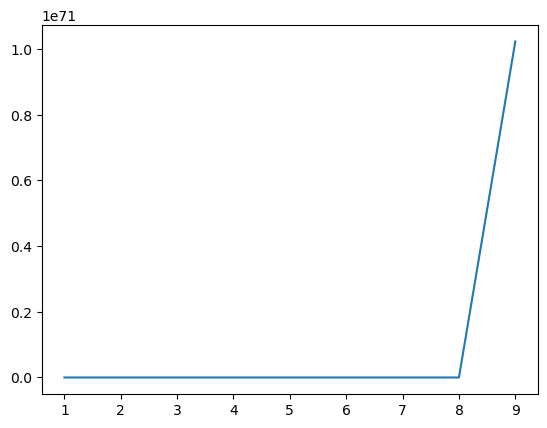

In [1111]:
print(output_poly1)
plt.plot(degrees, output_poly1)
plt.show()

### We see that in the above curve the curve gets minimum value on degree equal to 3-4 the graph is between mean square error and corresponding degrees. So the best model is with degree equal to 3-4

## Batch Gradient Descent vs Stochastic Gradient Descent 0.5 degree

[17612.830428091096, 13828.361767820174, 12371.421258675553, 11892.833882661178, 1.2881522804360496e+156, nan, nan, nan, nan]


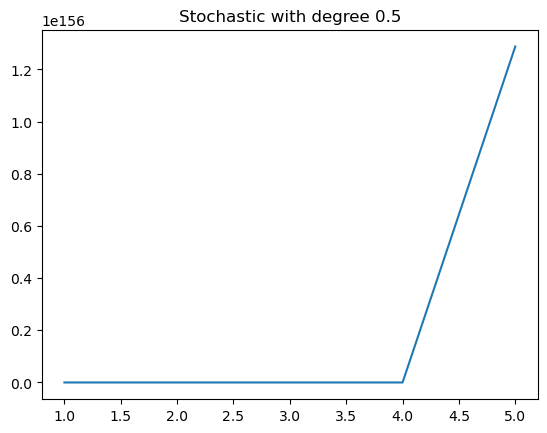

[237785.48054587742, 209709.69607319933, 161900.7818064989, 103368.79023947184, 116810.25358281794, 216482.45565903306, nan, nan, nan]


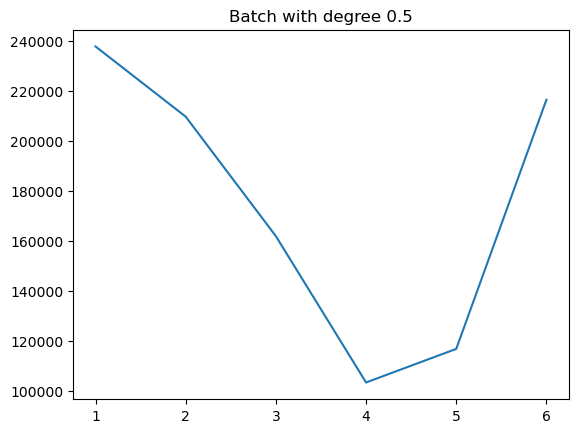

In [1107]:
print(output_stc_half)
plt.plot(degrees, output_stc_half)
plt.title("Stochastic with degree 0.5")
plt.show()
print(output_bch_half)
plt.plot(degrees, output_bch_half)
plt.title("Batch with degree 0.5")
plt.show()

### We see that in above comparison both graphs give minima at degrees between 3-6 The lowest mean square error in stochastic gradient descent is smaller than the lowest mean square error in batch gradient descent .So among these two the better model is the stochastic gradient descent for degree 0.5 as it is giving less mean square error


## Batch Gradient Descent vs Stochastic Gradient Descent 1 degree

[17698.889812079047, 13818.105426750775, 11811.74998901484, 9547.661748224393, 14575.790883158783, 20433.158369217093, nan, nan, nan]


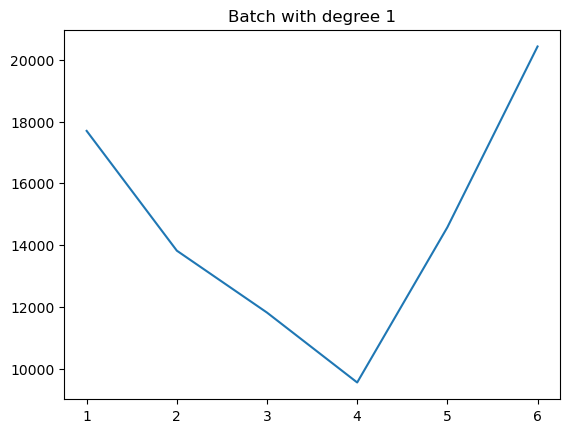

[42229.9029681142, 17992.203474083144, 37682.817304902834, 61316.07099309006, 58238.42136646064, 42696.58766697945, 2.293545219949798e+158, nan, nan]


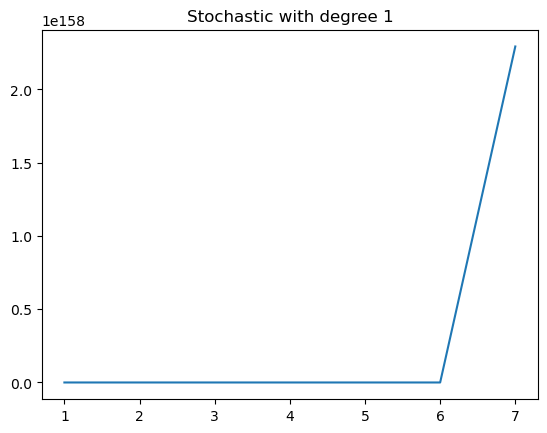

In [1108]:
print(output_bch_one)
plt.plot(degrees, output_bch_one)
plt.title("Batch with degree 1")
plt.show()

print(output_stc_one)
plt.plot(degrees, output_stc_one)
plt.title("Stochastic with degree 1")
plt.show()

### We see that in above comparison both graphs give minima at degrees between 3-6 The lowest mean square error in batch gradient descent smaller than the lowest mean square error in stochastic gradient descent .So among these two the better model is the batch gradient descent for degree 1 as it is giving less mean square error

## Batch Gradient Descent vs Stochastic Gradient Descent 2 degree

[18354.649425785497, 14004.492374251724, 11477.57153571205, 9778.713582037914, 15143.85343216183, 18613.988204653695, nan, nan, nan]


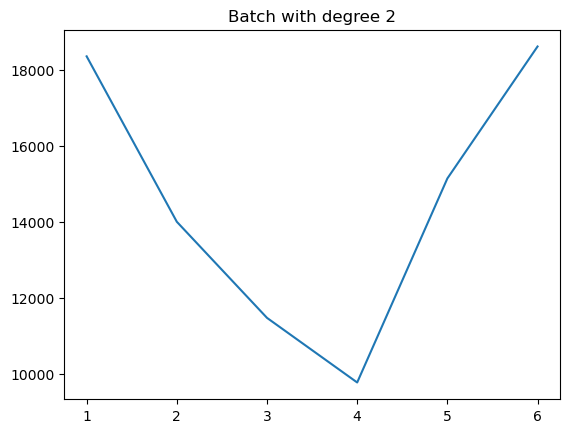

[108196.4216264352, 51633.533665371, 40035.098669298044, 65455.409820187015, 98062.98909474039, 338600.9844295733, 2.3949117745444053e+172, nan, nan]


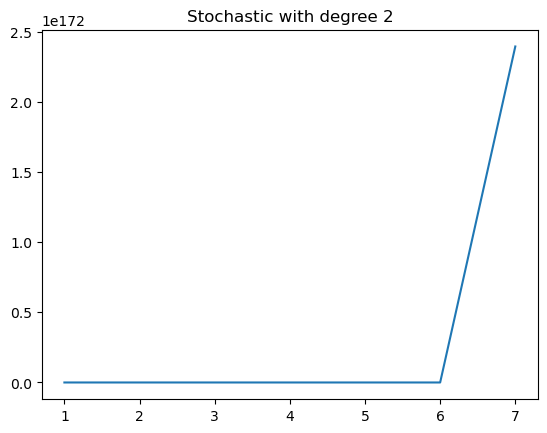

In [1109]:
print(output_bch_two)
plt.plot(degrees, output_bch_two)
plt.title("Batch with degree 2")
plt.show()

print(output_stc_two)
plt.plot(degrees, output_stc_two)
plt.title("Stochastic with degree 2")
plt.show()

### We see that in above comparison both graphs give minima at degrees between 3-6 The lowest mean square error in batch gradient descent is smaller than the lowest mean square error in stochastic gradient descent .So among these two the better model is the batch gradient descent for degree 2 as it is giving less mean square error

## Batch Gradient Descent vs Stochastic Gradient Descent 4 degree

[17696.861463413206, 13817.113694480991, 11811.686094630506, 9547.363373691896, 14574.84384164983, 20432.90708842424, nan, nan, nan]


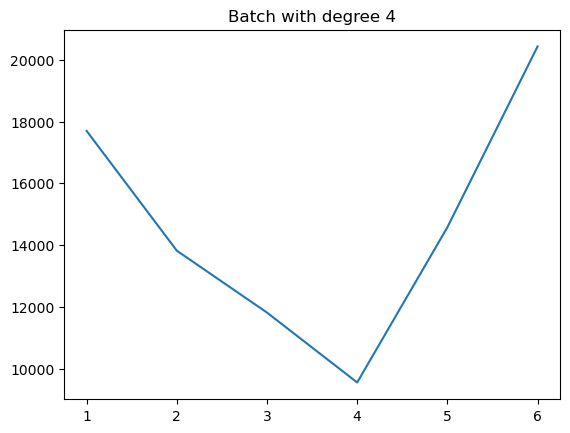

[115648.62977301175, 48195.093977127835, 37247.644994176364, 55693.68114366995, 69928.76824905784, 37318.01947313691, nan, nan, nan]


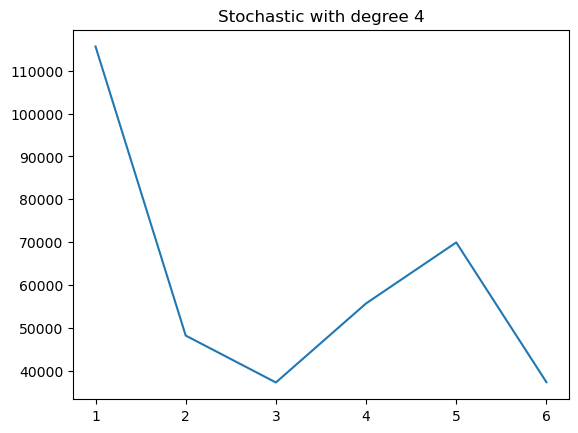

In [1110]:
print(output_bch_four)
plt.plot(degrees, output_bch_four)
plt.title("Batch with degree 4")
plt.show()
print(output_stc_four)
plt.plot(degrees, output_stc_four)
plt.title("Stochastic with degree 4")
plt.show()

### We see that in above comparison both graphs give minima at degrees between 3-6 The lowest mean square error in batch gradient descent is smaller than the lowest mean square error in stochastic gradient descent. So among these two the better model is the batch gradient descent for degree 2 as it is giving less mean square error